In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


Aqui será feito uma filtragem nos dados, caso ocorra do dataframe ter valores nulos para analisar se há a necessidade de preenchimento ou de remoção dependendo da quantidade de valores faltantes

In [ ]:
df_nulos = df.isnull().sum()
df_nulos.head()

fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
chlorides           0
dtype: int64

Como não houve valores nulos, podemos descartar a etapa de remoção de linhas

Aqui farei algumas visualizações graficas para entender o quanto cada caracteristica difere entre um vinho de qualidade mais alta e um de qualidade mais baixa

<Figure size 1500x1000 with 0 Axes>

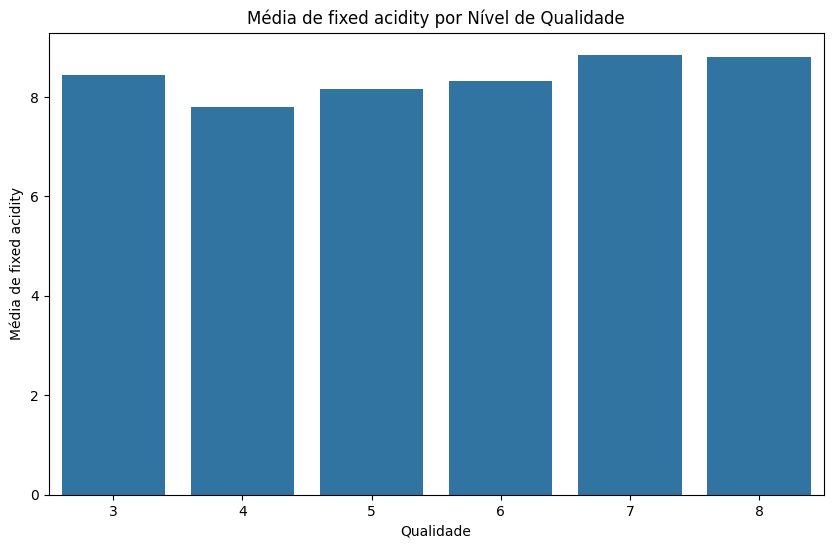

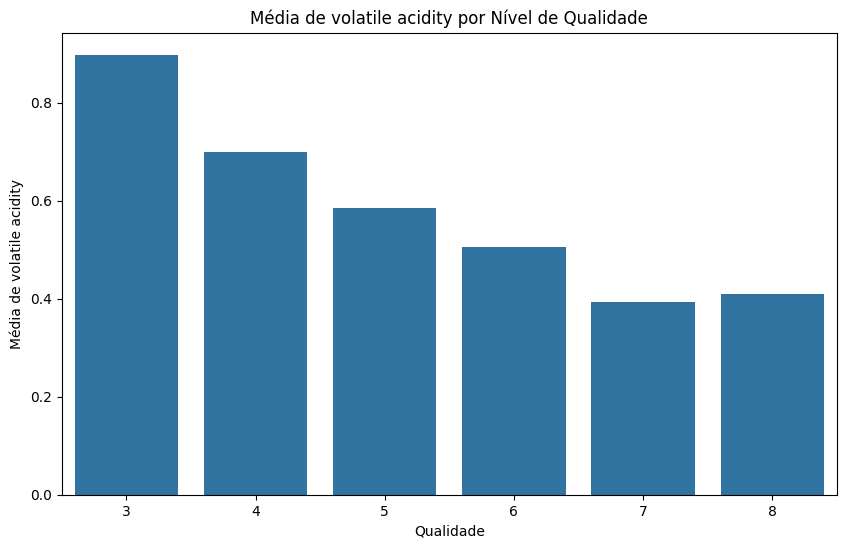

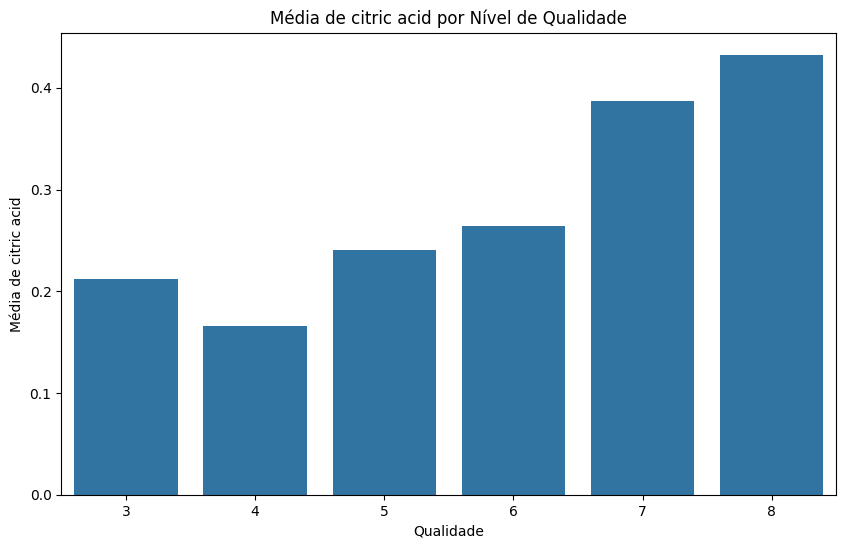

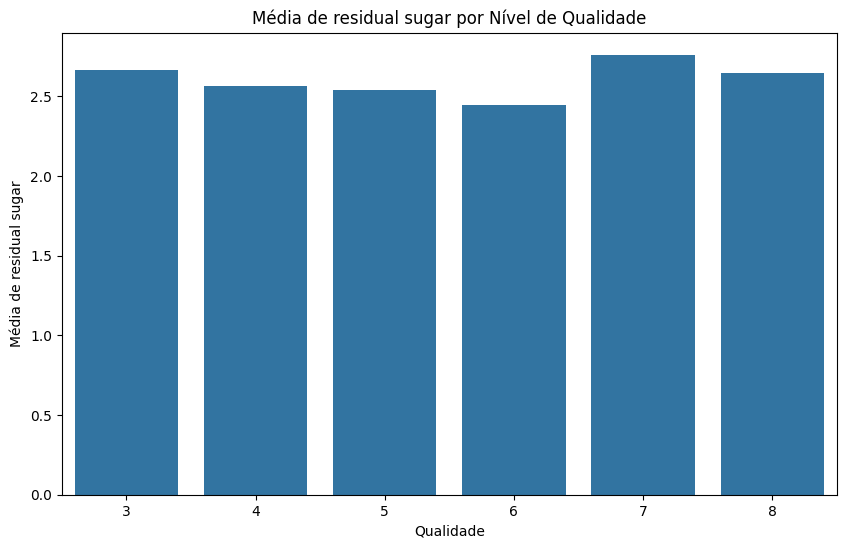

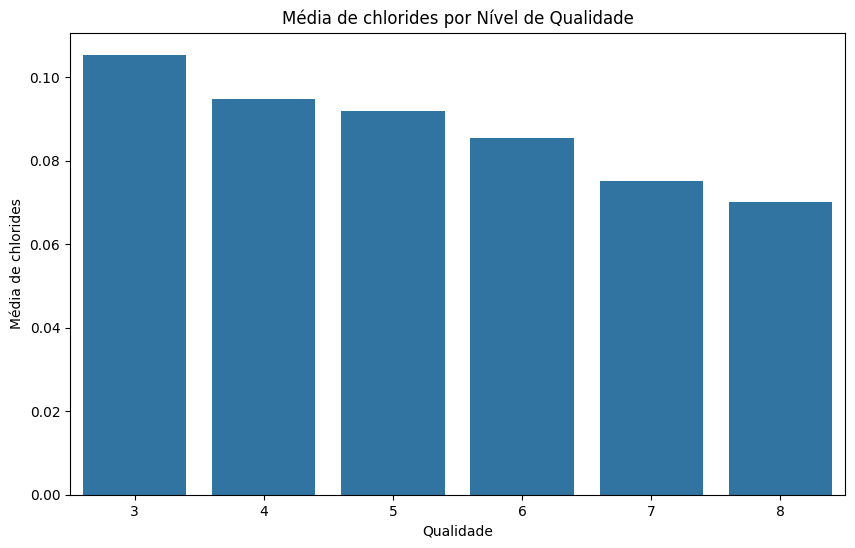

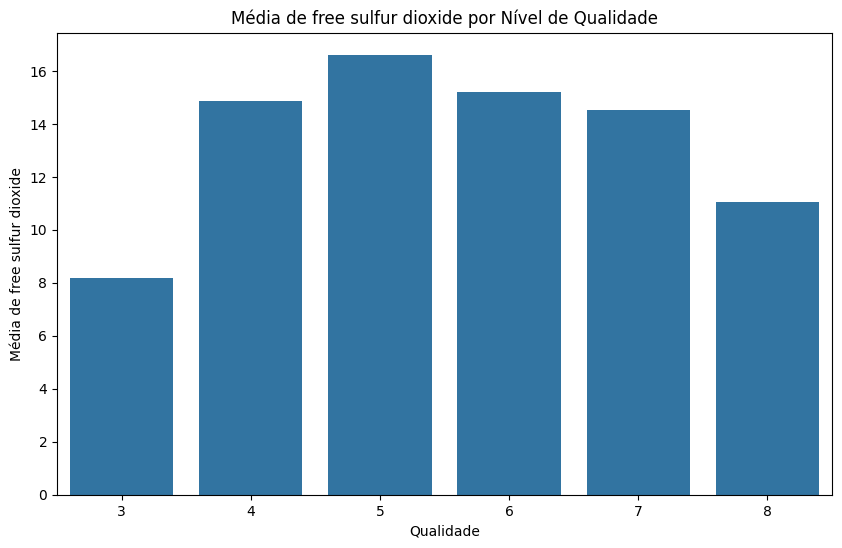

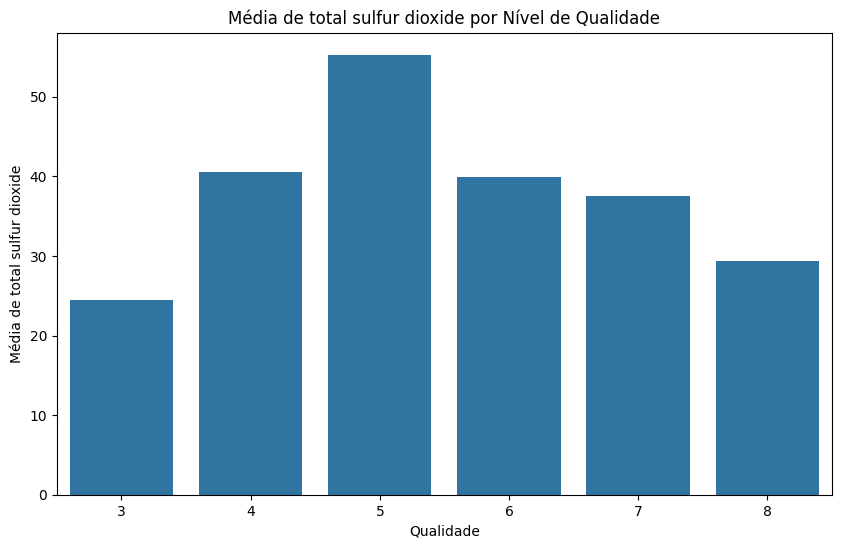

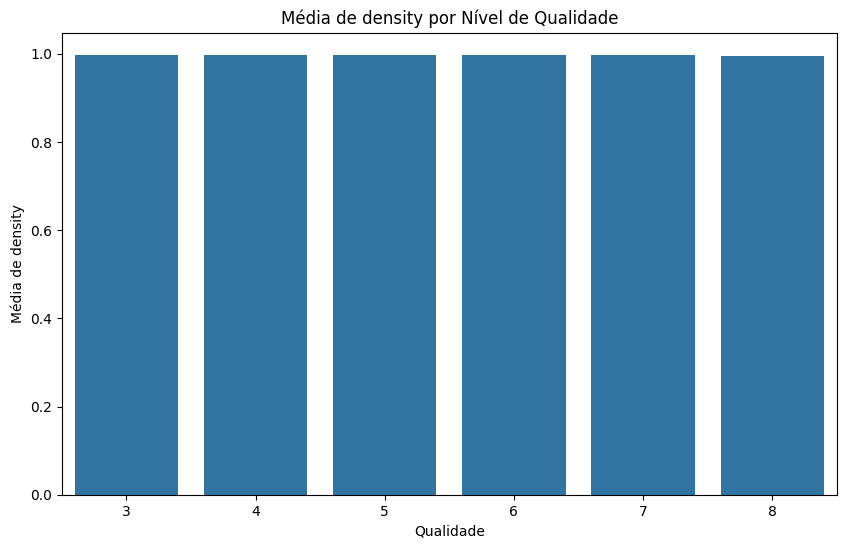

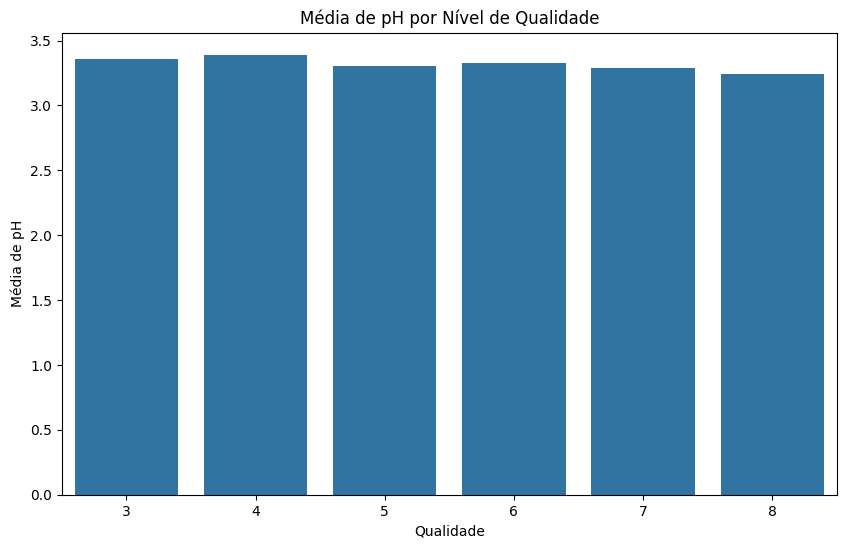

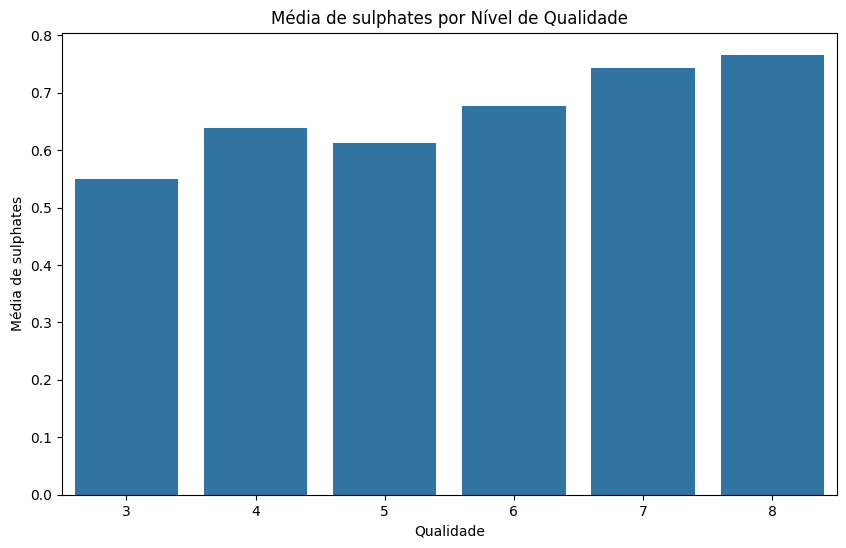

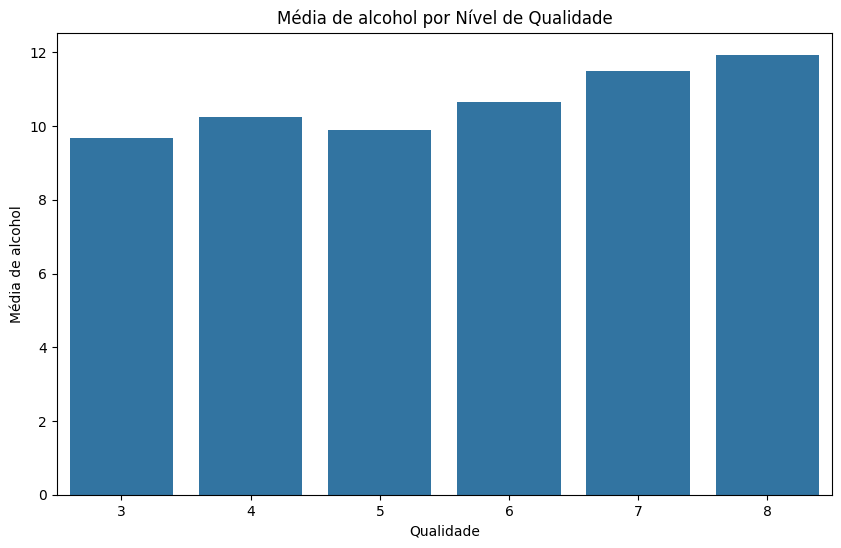

In [ ]:
# Calcular a média de cada variável por nível de qualidade
quality_means = df.groupby('quality').mean().reset_index()

# Definir o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Lista de níveis de qualidade presentes no conjunto de dados
quality_levels = sorted(df['quality'].unique())

# Criar gráficos de barras para cada variável
for column in df.columns[:-2]:  # Excluindo 'quality' e 'Id'
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='quality', y=column, data=quality_means, order=quality_levels)
    plt.title(f'Média de {column} por Nível de Qualidade')
    plt.xlabel('Qualidade')
    plt.ylabel(f'Média de {column}')
    plt.show()

Aqui vemos que a media de alguns valores são bastante semelhantes em diferentes niveis de qualidade, podendo afetar futuramente nas futuras analises, mas para uma melhor compreenção irei treinar um modelo que vai me dizer as principais caracteristicas impactantes para a classificação da bebida

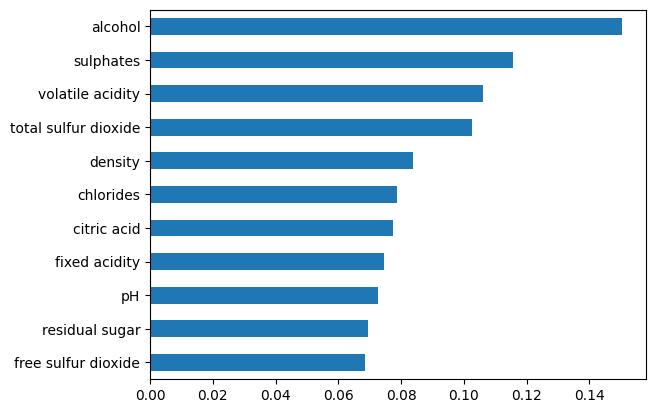

In [ ]:
# Preparar os dados
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Treinar um modelo de RandomForest
model = RandomForestClassifier()
model.fit(X, y)

# Ver a importância das características
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.show()

Aqui vemos que o principal fator que esta atrelado ao nivel de qualidade é a concentração de álcool, mostrando que diferente dos outros, ele acaba sendo oque mais se destaca.

Agora irei separar os dados em uma escala padrão de 30/70, sendo 30% para teste e 70% para treino, depois irei verificar como o modelo se saiu em relação aos valores reais


In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)



Apartir daqui irei gerar uma visualização e em seguida um calculo para ver em porcentagem a precisão do treino

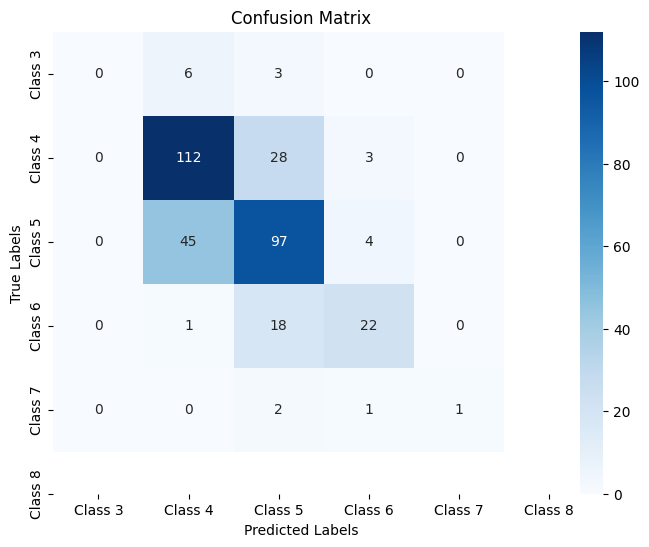

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Criar um gráfico de calor para a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8'],
            yticklabels=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

# Converter a precisão para porcentagem
accuracy_percentage = accuracy * 100

accuracy_percentage

67.63848396501457

Aqui vemos que o teste atingiu uma precisão de aproximadamente 67%, considerando que muitas caracteristicas se apresentam semelhantes mesmo em niveis de qualidade, da para dizer que foi um resultado esperado

Conclusão: Apesar de muitas fatores, é importante sempre considerar para quem esta sendo feita a bebida, as vezes uma bebida de classificação mais baixa não necessariamente é pior que outra, o importante é suprir as necessidades do cliente enquanto procura proporcionar uma melhor sensação de prazer ao beber